In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

In [3]:
def getPoints(filename,x_n,y_n):
    x_data=[]
    y_data=[]
    with open(filename) as f:
        for line in f:
            temp=[float(x) for x in line.split()]
            #print(temp[x_n],temp[y_n])
            x_data.append(temp[x_n])
            y_data.append(temp[y_n])
    return x_data,y_data

In [14]:
#read data
#models
x_Lut,y_Lut=getPoints("apec_right_flux.qdp",0,2)
x_2019high,y_2019high=getPoints("model2019high.qdp",0,2)
x_2019low,y_2019low=getPoints("model2019low.qdp",0,2)
x_2020high,y_2020high=getPoints("model2020high.qdp",0,2)
x_2020low,y_2020low=getPoints("model2020low.qdp",0,2)
x_thp,y_thp=getPoints("apec_power.qdp",0,2)
x_p,y_p=getPoints("power.qdp",0,2)
x_th,y_th=getPoints("thermal.qdp",0,2)

x_m_DS9,y_m_DS9=getPoints("modelDS9.qdp",0,2)
x_nonth_DS9,y_nonth_DS9=getPoints("nonthermalDS9.qdp",0,2)


#INTEGRAL
x_article,y_article=getPoints("Integral_points.qdp",0,1)
x_article_err,y_article_err=getPoints("errors_Integral.qdp",0,1)
print("x article",x_article)
print("y article",y_article)
#mine
x_2019,y_2019=getPoints("points2019.qdp",0,2)
x_2019_err,y_2019_err=getPoints("points2019.qdp",1,3)
x_2020,y_2020=getPoints("points2020.qdp",0,2)
x_2020_err,y_2020_err=getPoints("points2020.qdp",1,3)

#mineDS9
x_DS9,y_DS9=getPoints("comaDS9points.qdp",0,2)
x_DS9_err,y_DS9_err=getPoints("comaDS9points.qdp",1,3)

x article [19.533602932381754, 25.422756533701154, 36.305892044434565, 75.61174541961117]
y article [0.00019176857302053368, 6.298544692197064e-05, 8.350515009705537e-06, 2.0351585781379786e-06]


/home/sdd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Attempted to set non-positive top ylim on a log-scaled axis.
Invalid limit will be ignored.
  # Remove the CWD from sys.path while we load stuff.


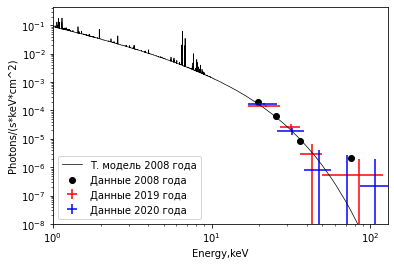

In [6]:
#non_thermal
#plot
plt.plot(x_Lut,y_Lut,color='black',linewidth=0.7,label='Т. модель 2008 года')
#plt.plot(x_new_full,y_thermal_power_new,color='green',linewidth=0.7,label='APEC+Степенной закон')
plt.scatter(x_article[0:4],y_article[0:4],marker='o',color='black',label='Данные 2008 года')
plt.errorbar(x_2019,y_2019,y_2019_err,x_2019_err,fmt='none',marker='.',color='red',label='Данные 2019 года')
plt.errorbar(x_2020,y_2020,y_2020_err,x_2020_err,fmt='none',marker='.',color='blue',label='Данные 2020 года')
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
xmin,xmax,ymin,ymax=plt.axis([1,129,1e-8,0])
plt.legend(loc='lower left')
plt.xlabel('Energy,keV')
plt.ylabel('Photons/(s*keV*cm^2)')
#plt.savefig('Data_comp_2pix_2019',dpi=1000)
plt.show()

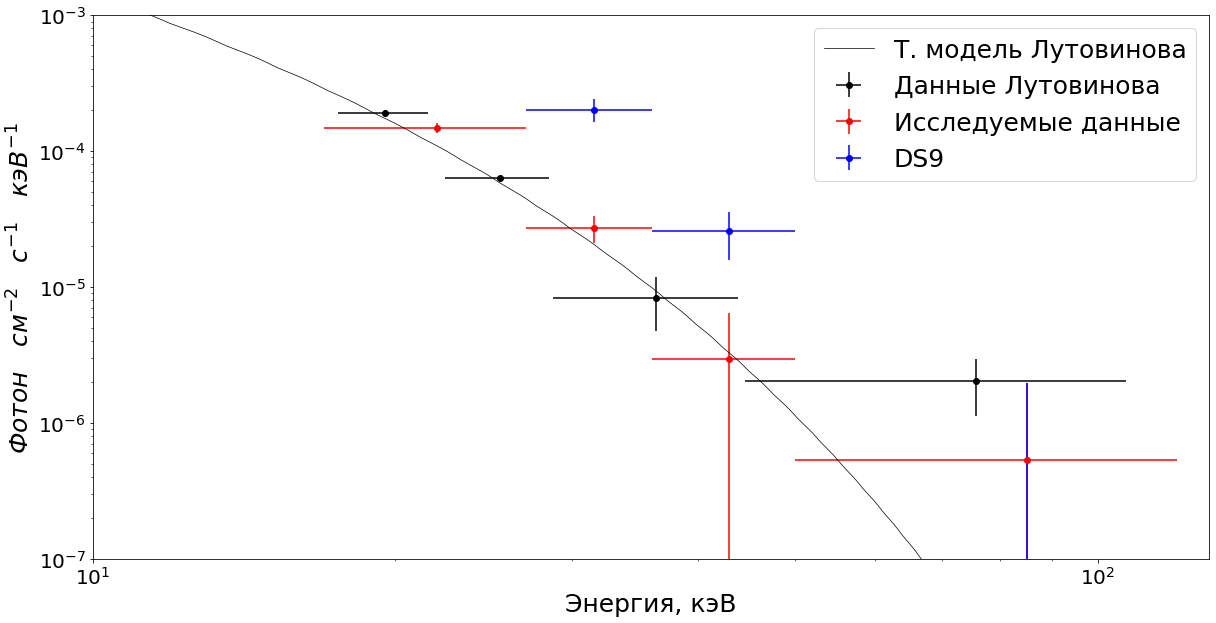

In [8]:
#non_thermal
#plot
plt.figure(figsize=(20,10))
plt.plot(x_Lut,y_Lut,color='black',linewidth=0.7,label='Т. модель Лутовинова')
plt.errorbar(x_article,y_article,y_article_err,x_article_err,fmt='.',marker='o',color='black',label='Данные Лутовинова')
plt.errorbar(x_2019,y_2019,y_2019_err,x_2019_err,fmt='.',marker='o',color='red',label='Исследуемые данные')
plt.errorbar(x_DS9,y_DS9,y_DS9_err,x_DS9_err,fmt='.',marker='o',color='blue',label='DS9')
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
plt.axis([10,129,1e-7,1e-3])
plt.gca().set_xlabel('Энергия, кэВ',fontsize=25)
plt.gca().set_ylabel(r'$Фотон \quad см^{-2} \quad с^{-1} \quad кэВ^{-1}$',fontsize=25)
plt.legend(loc='upper right',prop={'size':25})
plt.tick_params(axis='both', which='major', labelsize=20)
#plt.savefig('Data_comp',dpi=500)
plt.show()

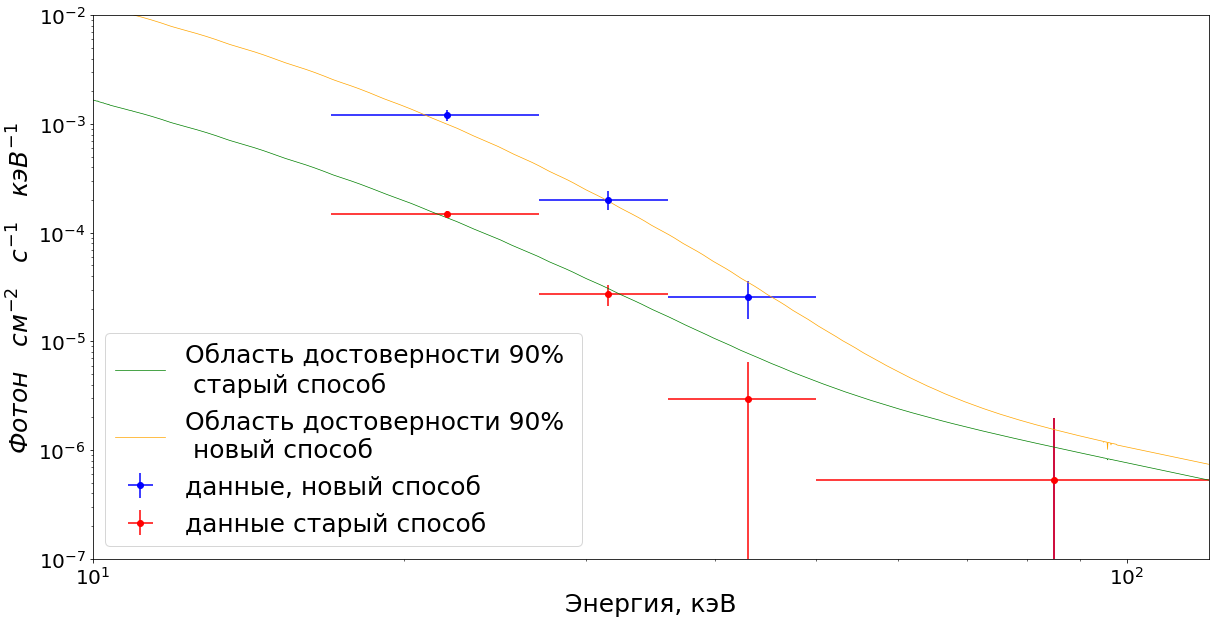

In [18]:
#non_thermal
#plot
plt.figure(figsize=(20,10))
plt.plot(x_2019high,y_2019high,color='green',linewidth=0.7,label='Область достоверности 90% \n старый способ')
#plt.plot(x_thp,y_thp,color='green',linewidth=0.7,label='Модель излучения')
#plt.plot(x_th,y_th,color='red',linewidth=0.7,label='Тепловая модель')
#plt.plot(x_p,y_p,color='red',linewidth=0.7,label='Нетепловая модель')

plt.errorbar(x_DS9,y_DS9,y_DS9_err,x_DS9_err,fmt='.',marker='o',color='blue',label='данные, новый способ')
plt.plot(x_m_DS9,y_m_DS9,color='orange',linewidth=0.7,label='Область достоверности 90% \n новый способ')
#plt.plot(x_nonth_DS9,y_nonth_DS9,color='blue',linewidth=0.7,label='Нетепловая модель DS9')


#plt.plot(x_2019low,y_2019low,color='green',linewidth=0.7)
#plt.errorbar(x_article,y_article,y_article_err,x_article_err,fmt='.',marker='o',color='black',label='Данные Лутовинова')
plt.errorbar(x_2019,y_2019,y_2019_err,x_2019_err,fmt='.',marker='o',color='red',label='данные старый способ')
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
plt.axis([10,120,1e-7,1e-2])
plt.gca().set_xlabel('Энергия, кэВ',fontsize=25)
plt.gca().set_ylabel(r'$Фотон \quad см^{-2} \quad с^{-1} \quad кэВ^{-1}$',fontsize=25)
plt.legend(loc='lower left',prop={'size':25})
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('method_comparison',dpi=500)
plt.show()

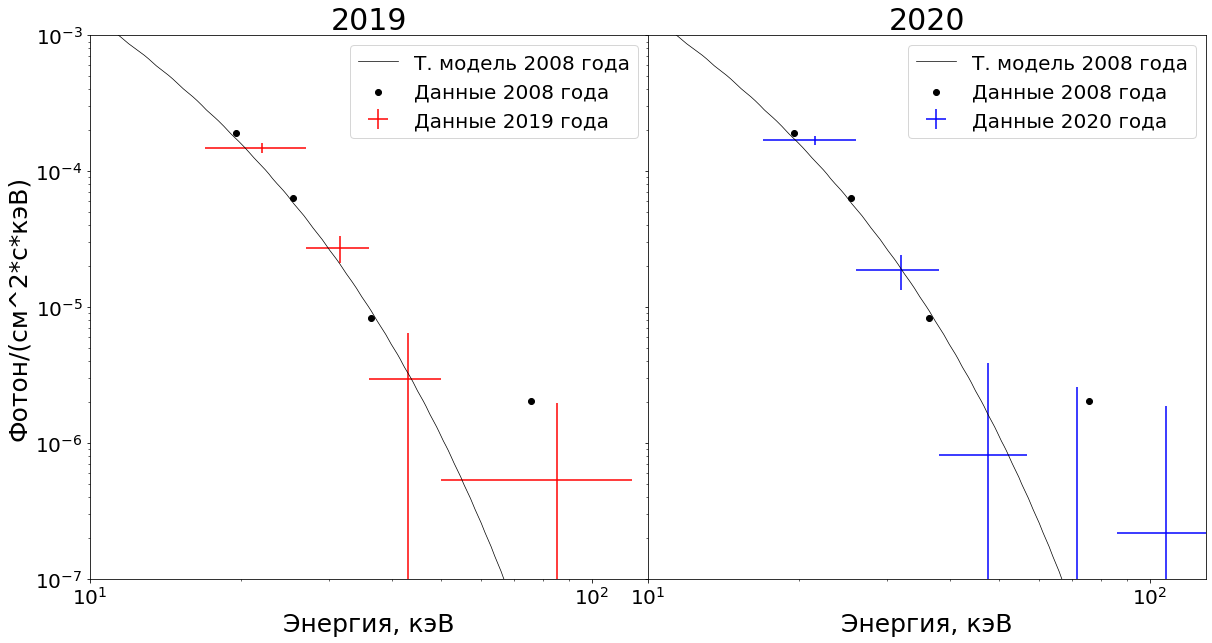

In [14]:
f,ax=plt.subplots(1,2,sharey=True,figsize=(20,10))
f.subplots_adjust(wspace=0)
ax[0].plot(x_Lut,y_Lut,color='black',linewidth=0.7,label='Т. модель 2008 года')
ax[0].errorbar(x_2019,y_2019,y_2019_err,x_2019_err,fmt='none',marker='.',color='red',label='Данные 2019 года')
ax[0].scatter(x_article,y_article,marker='o',color='black',label='Данные 2008 года')
ax[0].axes.set_yscale('log')
ax[0].axes.set_xscale('log')
ax[0].axis([10,129,1e-7,1e-3])
ax[0].axes.set_xlabel('Энергия, кэВ',fontsize=25)
ax[0].axes.set_ylabel('Фотон/(см^2*с*кэВ)',fontsize=25)
ax[0].legend(loc='upper right',prop={'size':20})

ax[0].set_title('2019',fontsize=30)
ax[1].set_title('2020',fontsize=30)

ax[1].plot(x_Lut,y_Lut,color='black',linewidth=0.7,label='Т. модель 2008 года')
ax[1].errorbar(x_2020,y_2020,y_2020_err,x_2020_err,fmt='none',marker='.',color='blue',label='Данные 2020 года')
ax[1].scatter(x_article,y_article,marker='o',color='black',label='Данные 2008 года')
ax[1].axes.set_yscale('log')
ax[0].tick_params(axis='both', which='major', labelsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=20)
ax[1].axes.set_xscale('log')
ax[1].axis([10,129,1e-7,1e-3])
ax[1].legend(loc='upper right',prop={'size':20})
ax[1].axes.set_xlabel('Энергия, кэВ',fontsize=25)
#plt.savefig('Data_comparison',dpi=500)

plt.plot(x_new_full,y_thermal_power_new,color='green',linewidth=0.7,label='APEC+Степенной закон')
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
xmin,xmax,ymin,ymax=plt.axis([10,129,1e-8,1e-3])

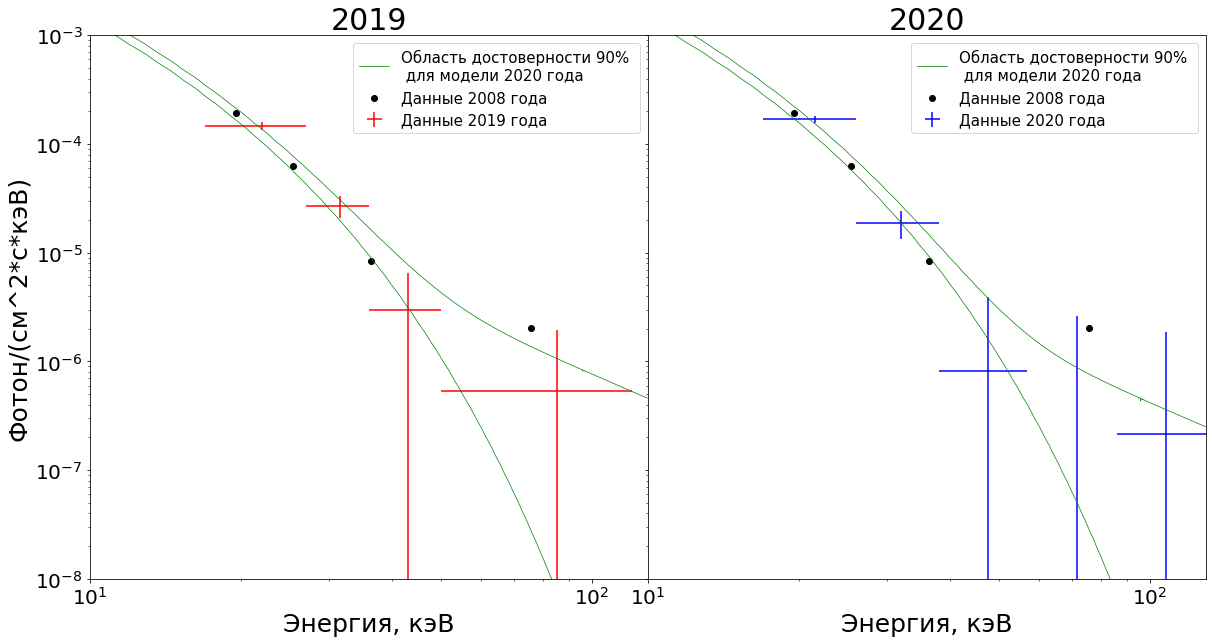

In [22]:
f,ax=plt.subplots(1,2,sharey=True,figsize=(20,10))
f.subplots_adjust(wspace=0)
ax[0].plot(x_2019high,y_2019high,color='green',linewidth=0.7,label='Область достоверности 90% \n для модели 2020 года')
ax[0].plot(x_2019low,y_2019low,color='green',linewidth=0.7)
ax[0].errorbar(x_2019,y_2019,y_2019_err,x_2019_err,fmt='none',marker='.',color='red',label='Данные 2019 года')
ax[0].scatter(x_article,y_article,marker='o',color='black',label='Данные 2008 года')
ax[0].axes.set_yscale('log')
ax[0].axes.set_xscale('log')
ax[0].axis([10,129,1e-8,1e-3])
ax[0].axes.set_xlabel('Энергия, кэВ',fontsize=25)
ax[0].axes.set_ylabel('Фотон/(см^2*с*кэВ)',fontsize=25)
ax[0].legend(loc='upper right',prop={'size':15})

ax[0].set_title('2019',fontsize=30)
ax[1].set_title('2020',fontsize=30)

ax[1].plot(x_2020high,y_2020high,color='green',linewidth=0.7,label='Область достоверности 90% \n для модели 2020 года')
ax[1].plot(x_2020low,y_2020low,color='green',linewidth=0.7)
ax[1].scatter(x_article,y_article,marker='o',color='black',label='Данные 2008 года')
ax[1].errorbar(x_2020,y_2020,y_2020_err,x_2020_err,fmt='none',marker='.',color='blue',label='Данные 2020 года')
ax[1].axes.set_yscale('log')
ax[0].tick_params(axis='both', which='major', labelsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=20)
ax[1].axes.set_xscale('log')
ax[1].axis([10,129,1e-8,1e-3])
ax[1].legend(loc='upper right',prop={'size':15})
ax[1].axes.set_xlabel('Энергия, кэВ',fontsize=25)
plt.savefig('90percent_models',dpi=500)

In [32]:
err_2019=np.zeros(len(y_2019))
for i in range(len(y_2019)):
    err_2019[i]=y_2019_err[i]/y_2019[i]

In [33]:
err_2020=np.zeros(len(y_2020))
for i in range(len(y_2020)):
    err_2020[i]=y_2020_err[i]/y_2020[i]

[0.08259042 0.22566118 1.18671123 2.67654468]
[  0.08154665   0.29113686   3.76119139 -28.29496621   7.71935228]


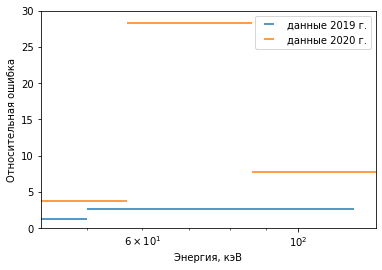

In [52]:
print(err_2019)
print(err_2020)
plt.errorbar(x_2019,abs(err_2019),xerr=x_2019_err,fmt='none',marker='.',label='данные 2019 г.')
plt.errorbar(x_2020,abs(err_2020),xerr=x_2020_err,fmt='none',marker='.',label='данные 2020 г.')
plt.gca().set_xscale('log')
xmin,xmax,ymin,ymax=plt.axis([43,129,0,30])
plt.legend(loc='upper right')
plt.xlabel('Энергия, кэВ')
plt.ylabel('Относительная ошибка')
plt.savefig('errors',dpi=500)

In [38]:
print(x_2019,x_2020)

[22.0, 31.5, 43.0, 85.0] [21.5, 32.0, 47.5, 71.5, 107.5]


In [20]:
x_thermal,y_thermal_power_max=getPoints("th_max.qdp",0,2)
x_power,y_power_max=getPoints("power_max.qdp",0,2)
x_Integral_errors,y_Integral_errors=getPoints("errors_Integral.qdp",0,1)
y_Integral_th_pow_2080=np.zeros(len(y_power_max))
for i in range(len(y_power_max)):
    y_Integral_th_pow_2080[i]=y_thermal_Lut[i]+y_power_max[i]*1.49/1.78
x_power,y_power_max_2050=getPoints("power_Integral_max_2050.qdp",0,2)
y_Integral_th_pow_2050=np.zeros(len(y_power_max))
for i in range(len(y_power_max)):
    y_Integral_th_pow_2050[i]=y_thermal_Lut[i]+y_power_max_2050[i]

/home/sdd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/home/sdd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Attempted to set non-positive top ylim on a log-scaled axis.
Invalid limit will be ignored.


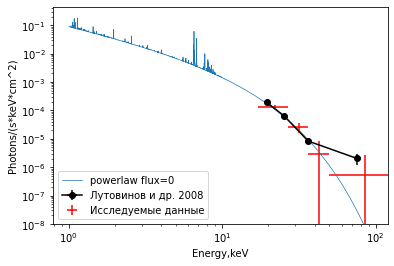

In [25]:
#non_thermal
#plot
plt.plot(x_thermal,y_thermal_Lut,linewidth=0.7,label='powerlaw flux=0')
#plt.plot(x_thermal,y_Integral_th_pow_2080,linewidth=0.7,label='powerlaw flux 20-80=1.49e-11')
#plt.plot(x_thermal,y_Integral_th_pow_2050,linewidth=0.7,label='powerlaw flux 20-50=1.49e-11')


#plt.plot(x_thermal,y_thermal_power_max,color='green',linewidth=0.7)
#plt.plot(x_power,y_power_max)
#plt.plot(x_power,y_Integral_th_pow)
#plt.plot(x_thermal,complete_max,color='green',label='Модель max')
#plt.plot(x_power_mean,y_power_mean,label='power max')
plt.errorbar(x_article,y_article,y_Integral_errors,x_Integral_errors,marker='o',color='black',label='Лутовинов и др. 2008')
plt.errorbar(x_mine_adj,y_mine_adj,y_mine_errors_adj,x_mine_errors_adj,fmt='none',marker='.',color='red',label='Исследуемые данные')
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
xmin,xmax,ymin,ymax=plt.axis([0,120,1e-8,0])
plt.legend(loc='lower left')
plt.xlabel('Energy,keV')
plt.ylabel('Photons/(s*keV*cm^2)')
#plt.savefig('Lutovinov_err_comp',dpi=1000)
plt.show()

In [32]:
for i in range(len(y_thermal_power)):
    print(i,x_thermal[i],y_thermal_power[i])
    

0 1.00047898 0.089385502
1 1.00143743 0.0893229842
2 1.0023967 0.089361988
3 1.00335693 0.0890772939
4 1.00431812 0.089082323
5 1.00528026 0.0889503732
6 1.00624323 0.0888732225
7 1.00720716 0.0885421708
8 1.00817204 0.089495644
9 1.00913787 0.0883216634
10 1.01010454 0.0882040337
11 1.01107216 0.0880990475
12 1.01204073 0.0880468488
13 1.01301026 0.0878222436
14 1.01398063 0.0877092034
15 1.01495206 0.0876034647
16 1.01592433 0.0875447765
17 1.01689756 0.0874284878
18 1.01787162 0.0872311965
19 1.01884675 0.0876042396
20 1.01982272 0.0869877487
21 1.02079964 0.0874681473
22 1.02177763 0.0868203416
23 1.02275634 0.0867778659
24 1.02373612 0.086511299
25 1.02471685 0.086416699
26 1.02569842 0.0867028311
27 1.02668107 0.0861362815
28 1.02766454 0.085989438
29 1.02864897 0.0858616158
30 1.02963448 0.0861084014
31 1.03062081 0.0856377706
32 1.0316081 0.0855137259
33 1.03259635 0.0953185484
34 1.03358543 0.0852676854
35 1.03457558 0.0851432532
36 1.03556669 0.0853112265
37 1.03655875 0.0848

555 1.70214713 0.0411382131
556 1.70377767 0.0410677828
557 1.70540977 0.0480083898
558 1.70704353 0.0419010371
559 1.70867884 0.0422599874
560 1.71031559 0.0414717831
561 1.711954 0.0407491028
562 1.71359408 0.040702302
563 1.71523559 0.0408753604
564 1.71687865 0.0405414701
565 1.71852338 0.0405554175
566 1.72016966 0.0404203013
567 1.72181749 0.0403310843
568 1.72346699 0.0413745642
569 1.72511792 0.0402155891
570 1.72677052 0.0401654653
571 1.72842467 0.0401189476
572 1.73008049 0.040332105
573 1.73173785 0.0401369482
574 1.73339677 0.0399569869
575 1.73505723 0.0399022885
576 1.73671937 0.0398500152
577 1.73838305 0.040312361
578 1.74004841 0.0397467613
579 1.74171531 0.0396950543
580 1.74338377 0.040107578
581 1.74505389 0.0400888361
582 1.74672556 0.0395372473
583 1.74839878 0.0395005867
584 1.75007367 0.0394325927
585 1.75175023 0.0393770263
586 1.75342834 0.0393248126
587 1.755108 0.0392745398
588 1.75678933 0.0392347053
589 1.7584722 0.0391755588
590 1.76015675 0.0394003242
5

1041 2.71077514 0.0199170616
1042 2.71337199 0.0199096929
1043 2.71597123 0.0198630281
1044 2.71857309 0.0198321138
1045 2.72117734 0.0198059026
1046 2.72378421 0.0197784975
1047 2.72639346 0.0199440159
1048 2.7290051 0.0197229553
1049 2.73161936 0.0196955651
1050 2.73423624 0.0196682159
1051 2.73685551 0.0196409822
1052 2.73947716 0.0196134262
1053 2.74210167 0.0195858628
1054 2.74472833 0.0195584688
1055 2.74735761 0.0195312407
1056 2.74998951 0.019503532
1057 2.75262403 0.0194760989
1058 2.75526094 0.0194487367
1059 2.75790024 0.0194212794
1060 2.76054215 0.0193946529
1061 2.76318669 0.0193663053
1062 2.76583362 0.0193386953
1063 2.76848316 0.0193110891
1064 2.77113533 0.0192833822
1065 2.77378988 0.0192557909
1066 2.77644706 0.0192280412
1067 2.77910686 0.0192003492
1068 2.78176904 0.0191726349
1069 2.78443384 0.0191449057
1070 2.78710127 0.0191171207
1071 2.78977132 0.0190893617
1072 2.79244375 0.0190616567
1073 2.79511881 0.0190336555
1074 2.79779625 0.0190057866
1075 2.80047655 

1520 4.28823996 0.00916877575
1521 4.29234791 0.00900220312
1522 4.29645967 0.00898566004
1523 4.30057526 0.00896910205
1524 4.30469513 0.00895252917
1525 4.30881882 0.00893593952
1526 4.3129468 0.00891933497
1527 4.31707811 0.00890271366
1528 4.32121372 0.0088860793
1529 4.32535315 0.00887007266
1530 4.32949686 0.00885480829
1531 4.33364439 0.00884230155
1532 4.33779573 0.0088214362
1533 4.34195137 0.00880473293
1534 4.34611082 0.00878799893
1535 4.35027409 0.00877125748
1536 4.35444117 0.00875453558
1537 4.35861254 0.00873858668
1538 4.3627882 0.00872294698
1539 4.36696768 0.00870733336
1540 4.37115097 0.00869164988
1541 4.37533808 0.00867593661
1542 4.37952948 0.00866022985
1543 4.38372517 0.00864742976
1544 4.38792419 0.00862903241
1545 4.39212799 0.00861307699
1546 4.39633512 0.00859730598
1547 4.40054703 0.00858170725
1548 4.40476227 0.00856767688
1549 4.4089818 0.00855053775
1550 4.41320562 0.00853447616
1551 4.41743326 0.0085201785
1552 4.42166471 0.00850612111
1553 4.42590046 

2005 6.82275295 0.0044763023
2006 6.82928896 0.00347893219
2007 6.83583117 0.0034721531
2008 6.84237957 0.00346541684
2009 6.84893417 0.00345867407
2010 6.85549498 0.00345192524
2011 6.86206245 0.00381437759
2012 6.86863613 0.00344711659
2013 6.87521601 0.00352126407
2014 6.88180208 0.00342488638
2015 6.88839436 0.00341881393
2016 6.89499331 0.00341137801
2017 6.90159845 0.00340545573
2018 6.9082098 0.00339959469
2019 6.91482735 0.00339096854
2020 6.92145157 0.00338474941
2021 6.92808199 0.00337735238
2022 6.93471909 0.00337059703
2023 6.9413619 0.00336408662
2024 6.9480114 0.0033575811
2025 6.95466757 0.00335011724
2026 6.96132994 0.00334336911
2027 6.9679985 0.00333642145
2028 6.97467327 0.00333014876
2029 6.98135471 0.00332266302
2030 6.98804283 0.0033161859
2031 6.99473715 0.00330908317
2032 7.00143766 0.00330315065
2033 7.00814486 0.00330159278
2034 7.01485825 0.00328928512
2035 7.02157831 0.00328274211
2036 7.02830458 0.00330870901
2037 7.03503752 0.0032772331
2038 7.04177666 0.0

2479 10.7415276 0.00116850762
2480 10.7518167 0.00116581761
2481 10.7621164 0.00116338104
2482 10.7724266 0.00116164878
2483 10.7827463 0.00116038416
2484 10.7930756 0.00115503662
2485 10.8034143 0.00115233485
2486 10.8137636 0.00114964251
2487 10.8241234 0.00114693865
2488 10.8344917 0.00114422943
2489 10.8448706 0.00114151766
2490 10.8552599 0.00113892008
2491 10.8656588 0.00113632134
2492 10.8760681 0.00113336684
2493 10.8864861 0.00113065797
2494 10.8969154 0.00112801231
2495 10.9073544 0.00113112689
2496 10.9178028 0.00112274569
2497 10.9282618 0.00112010317
2498 10.9387302 0.00111746183
2499 10.9492092 0.00111481885
2500 10.9596977 0.00111217354
2501 10.9701967 0.00110952579
2502 10.9807062 0.0011068756
2503 10.9912252 0.00110422343
2504 11.0017538 0.00110175379
2505 11.0122938 0.00109891
2506 11.0228424 0.00109625002
2507 11.0334024 0.00109358795
2508 11.043972 0.00109092344
2509 11.0545511 0.00108825625
2510 11.0651407 0.00108558673
2511 11.0757408 0.0010829682
2512 11.0863514 

2996 17.6219254 0.000253913924
2997 17.6388073 0.000253131089
2998 17.6557045 0.000252347527
2999 17.672617 0.000251563208
3000 17.6895466 0.000250778132
3001 17.7064934 0.000249992328
3002 17.7234554 0.000249205827
3003 17.7404327 0.000248418568
3004 17.7574272 0.000247630582
3005 17.7744389 0.00024684181
3006 17.7914658 0.00024605231
3007 17.8085098 0.000245262112
3008 17.8255692 0.000244471186
3009 17.8426456 0.000243679504
3010 17.8597374 0.000242887065
3011 17.8768463 0.000242093869
3012 17.8939724 0.000241299931
3013 17.9111137 0.000240505222
3014 17.9282722 0.000239709974
3015 17.945446 0.000238915483
3016 17.9626369 0.000238120527
3017 17.979845 0.000237324813
3018 17.9970684 0.000236528344
3019 18.0143089 0.000235731146
3020 18.0315666 0.000234933221
3021 18.0488396 0.00023413451
3022 18.0661297 0.000233335057
3023 18.0834351 0.000232534832
3024 18.1007595 0.000231733851
3025 18.1180992 0.000230932128
3026 18.1354542 0.000230129677
3027 18.1528282 0.00022932647
3028 18.1702175

3267 22.8425713 9.35235948e-05
3268 22.8644543 9.31140385e-05
3269 22.8863564 9.27041256e-05
3270 22.9082813 9.22939653e-05
3271 22.9302254 9.18834412e-05
3272 22.9521923 9.14725242e-05
3273 22.9741802 9.10612216e-05
3274 22.9961872 9.06495479e-05
3275 23.0182171 9.02374886e-05
3276 23.0402679 8.98250364e-05
3277 23.0623398 8.94121986e-05
3278 23.0844326 8.89989751e-05
3279 23.1065464 8.8585366e-05
3280 23.1286812 8.81713786e-05
3281 23.1508369 8.7766035e-05
3282 23.1730156 8.74213583e-05
3283 23.1952133 8.70877629e-05
3284 23.2174339 8.67538474e-05
3285 23.2396755 8.64196118e-05
3286 23.2619381 8.60850632e-05
3287 23.2842216 8.57501946e-05
3288 23.3065262 8.5415144e-05
3289 23.3288536 8.50811848e-05
3290 23.351202 8.47473129e-05
3291 23.3735714 8.44132446e-05
3292 23.3959618 8.40790162e-05
3293 23.4183731 8.37444604e-05
3294 23.4408073 8.34096136e-05
3295 23.4632626 8.30746721e-05
3296 23.4857407 8.27394688e-05
3297 23.5082378 8.24039671e-05
3298 23.5307579 8.20681526e-05
3299 23.5532

3715 35.0783882 1.15308949e-05
3716 35.1119919 1.14699487e-05
3717 35.1456261 1.14089571e-05
3718 35.1792946 1.13479091e-05
3719 35.2129974 1.12868647e-05
3720 35.246727 1.12260368e-05
3721 35.2804947 1.11651852e-05
3722 35.3142891 1.11051559e-05
3723 35.3481216 1.10495766e-05
3724 35.3819809 1.09945895e-05
3725 35.4158783 1.09395542e-05
3726 35.4498024 1.08844797e-05
3727 35.4837646 1.08304203e-05
3728 35.5177536 1.07770074e-05
3729 35.5517807 1.07235473e-05
3730 35.5858345 1.06700381e-05
3731 35.6199265 1.0616478e-05
3732 35.6540489 1.05628715e-05
3733 35.6882019 1.05092622e-05
3734 35.722393 1.04556184e-05
3735 35.7566109 1.04019246e-05
3736 35.7908669 1.03482062e-05
3737 35.8251495 1.02945041e-05
3738 35.8594704 1.02408194e-05
3739 35.8938217 1.01870864e-05
3740 35.9282074 1.0133308e-05
3741 35.9626236 1.00799016e-05
3742 35.9970741 1.0026728e-05
3743 36.031559 9.97350526e-06
3744 36.0660744 9.92023433e-06
3745 36.1006241 9.86691339e-06
3746 36.1352081 9.81354333e-06
3747 36.169822

4207 56.1863823 5.16290811e-07
4208 56.2402077 5.13019984e-07
4209 56.2940826 5.0975126e-07
4210 56.348011 5.06483502e-07
4211 56.401989 5.03215631e-07
4212 56.4560204 4.99946111e-07
4213 56.5101013 4.96673806e-07
4214 56.5642357 4.93399739e-07
4215 56.6184235 4.90139485e-07
4216 56.6726608 4.86883152e-07
4217 56.7269478 4.83624433e-07
4218 56.781292 4.80366054e-07
4219 56.8356857 4.77107733e-07
4220 56.8901329 4.73847109e-07
4221 56.9446297 4.7058515e-07
4222 56.9991798 4.67320518e-07
4223 57.0537834 4.64053073e-07
4224 57.1084366 4.60784662e-07
4225 57.163147 4.57514972e-07
4226 57.217907 4.54242581e-07
4227 57.2727165 4.50967434e-07
4228 57.3275833 4.47696834e-07
4229 57.3824997 4.44461961e-07
4230 57.4374695 4.41236779e-07
4231 57.4924927 4.38010005e-07
4232 57.5475693 4.34780702e-07
4233 57.6026955 4.31548813e-07
4234 57.6578751 4.28314848e-07
4235 57.7131119 4.25080799e-07
4236 57.7683983 4.21844277e-07
4237 57.8237381 4.18605111e-07
4238 57.8791313 4.15363331e-07
4239 57.9345741

4656 86.3657455 3.34655219e-08
4657 86.4484863 3.33340253e-08
4658 86.5312958 3.32026069e-08
4659 86.6141891 3.30712524e-08
4660 86.6971664 3.29399299e-08
4661 86.7802124 3.28086323e-08
4662 86.8633499 3.26781162e-08
4663 86.9465561 3.25597682e-08
4664 87.0298462 3.24457439e-08
4665 87.1132202 3.23317586e-08
4666 87.1966705 3.22178124e-08
4667 87.2802048 3.21039018e-08
4668 87.3638153 3.19900586e-08
4669 87.4475021 3.18762652e-08
4670 87.5312729 3.17625215e-08
4671 87.6151276 3.16489519e-08
4672 87.6990585 3.1539944e-08
4673 87.7830658 3.14331459e-08
4674 87.8671646 3.13266639e-08
4675 87.9513321 3.12203383e-08
4676 88.0355911 3.11140731e-08
4677 88.1199188 3.10078789e-08
4678 88.2043381 3.0901731e-08
4679 88.2888336 3.07956363e-08
4680 88.3734131 3.06898862e-08
4681 88.4580688 3.05843812e-08
4682 88.5428085 3.04790255e-08
4683 88.6276245 3.03738403e-08
4684 88.712532 3.02686978e-08
4685 88.7975082 3.01637577e-08
4686 88.882576 3.005972e-08
4687 88.96772 2.99558529e-08
4688 89.052948 2

In [52]:
#y_thermal_power[4764]=(y_thermal_power[4763]+y_thermal_power[4765])/2
y_thermal_power[4764]=2.368e-08
y_thermal_power[4755]=2.425e-08
y_thermal_power[4759]=2.395e-08

In [70]:
#75
print(y_thermal_Lut[4509],y_thermal_power_max[4509])
high_fl=y_thermal_power_max[4509]
Lut_point=y_article[3]
print(high_fl*75*1.60218*1e-9,Lut_point*(75*1.60218*1e-9)**2)

3.15076534e-08 1.45598949e-06
1.74956793081615e-13 2.938619755216092e-20


/home/sdd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  # Remove the CWD from sys.path while we load stuff.
/home/sdd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Attempted to set non-positive top ylim on a log-scaled axis.
Invalid limit will be ignored.
  # Remove the CWD from sys.path while we load stuff.


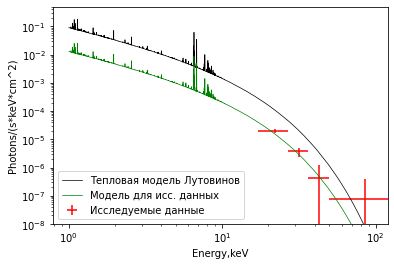

In [19]:
#plot
plt.errorbar(x_mine,y_mine,y_mine_errors,x_mine_errors,fmt='none',marker='.',color='red',label='Исследуемые данные')
#plt.scatter(x_article,y_article,marker='o',color='black',label='Лутовинов и др.')
plt.plot(x_thermal,y_thermal_Lut,color='black',linewidth=0.7,label='Тепловая модель Лутовинов')
#plt.plot(x_thermal,y_thermal_adjusted,label='Тепловое излучение')
plt.plot(x_thermal,y_thermal_not_adjusted,color='green',linewidth=0.7,label='Модель для исс. данных')
#plt.errorbar(x_mine_adj,y_mine_adj,y_mine_errors_adj,x_mine_errors_adj,fmt='none',marker='.',color='red',label='Исследуемые данные adj')
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
xmin,xmax,ymin,ymax=plt.axis([0,120,1e-8,0])
plt.legend(loc='lower left')
plt.xlabel('Energy,keV')
plt.ylabel('Photons/(s*keV*cm^2)')
#plt.savefig('Thermal_models_calibration',dpi=1000)
plt.show()

/home/sdd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  import sys
/home/sdd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Attempted to set non-positive top ylim on a log-scaled axis.
Invalid limit will be ignored.
  import sys


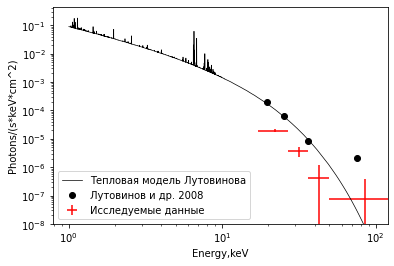

In [16]:
plt.scatter(x_article,y_article,marker='o',color='black',label='Лутовинов и др. 2008')
plt.plot(x_thermal,y_thermal_Lut,color='black',linewidth=0.7,label='Тепловая модель Лутовинова')
plt.errorbar(x_mine,y_mine,y_mine_errors,x_mine_errors,fmt='none',marker='.',color='red',label='Исследуемые данные')
#plt.errorbar([38.5],[7.30932197E-6],[6.1145289E-7],[21.5],color='green')
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
xmin,xmax,ymin,ymax=plt.axis([0,120,1e-8,0])
plt.legend(loc='lower left')
plt.xlabel('Energy,keV')
plt.ylabel('Photons/(s*keV*cm^2)')
#plt.savefig('Data_comparison',dpi=1000)
plt.show()